# US bike-sharing provider BoomBikes

### Problem Statement
Consider a bike-sharing company that has a dataset on daily bike demands across the American market for 2018-19 containing the usage of their bikes in the USA. We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features.

**Essentially, the company wants —**
- To come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state
- To understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19
- To understand the factors affecting the demand for these shared bikes in the American market

# 1. Data understanding, preparation and EDA

## 1.a - Reading & Understanding the Data

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# To read the housing dataset
import numpy as np
import pandas as pd

In [3]:
# For visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Use Regression models
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [5]:
# Reading the csv file to understand the data
bike_data = pd.read_csv("day.csv")
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the housing dataframe

In [6]:
# To check the count of rows and columns in the datasheet
bike_data.shape

(730, 16)

In [7]:
# To understand the datatypes and to check if there are any null values
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
# Dropping "instant" column as we have default df indexing
bike_data = bike_data.drop(["instant"], axis=1)

In [9]:
# Dropping insignificant columns from the dataframe
# dteday not required as we have month and year column values
# casual & registered not required as we have cnt column which sum up both
bike_data = bike_data.drop(["dteday","casual","registered"], axis=1)

In [10]:
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
# Change Data Type: replace "season" the numerical vars with actual categorical values
bike_data["season"] = bike_data["season"].map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})

In [12]:
bike_data["season"].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [13]:
# Change Data Type: replace "mnth" the numerical vars with actual categorical values
bike_data["mnth"] = bike_data["mnth"].map({1:"jan", 2:"feb", 3:"mar", 4:"apr", 5:"may", 6:"jun", 7:"jul", 8:"aug", 9:"sep", 10:"oct", 11:"nov", 12:"dec"})

In [14]:
bike_data["mnth"].value_counts()

jan    62
mar    62
oct    62
may    62
dec    62
jul    62
aug    62
jun    60
sep    60
apr    60
nov    60
feb    56
Name: mnth, dtype: int64

In [15]:
# Change Data Type: replace "weekday" the numerical vars with actual categorical values
bike_data["weekday"] = bike_data["weekday"].map({0:"Sun", 1:"Mon", 2:"Tues", 3:"Wed", 4:"Thur", 5:"Fri", 6:"Sat"})

In [16]:
bike_data["weekday"].value_counts()

Mon     105
Tues    105
Thur    104
Sat     104
Wed     104
Fri     104
Sun     104
Name: weekday, dtype: int64

In [17]:
# Change Data Type: replace "weathersit" the numerical vars with actual categorical values
bike_data["weathersit"] = bike_data["weathersit"].map({1:"clear-sky", 2:"cloudy+mist", 3:"snow+rain"})

In [18]:
bike_data["weathersit"].value_counts()

clear-sky      463
cloudy+mist    246
snow+rain       21
Name: weathersit, dtype: int64

In [19]:
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,Mon,1,cloudy+mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,Tues,1,cloudy+mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,Wed,1,clear-sky,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,Thur,1,clear-sky,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,Fri,1,clear-sky,9.305237,11.46350,43.6957,12.522300,1600


In [20]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [21]:
bike_data.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


## 1.b - Data Visualization

### 1.b.(i) - Numerical Variables

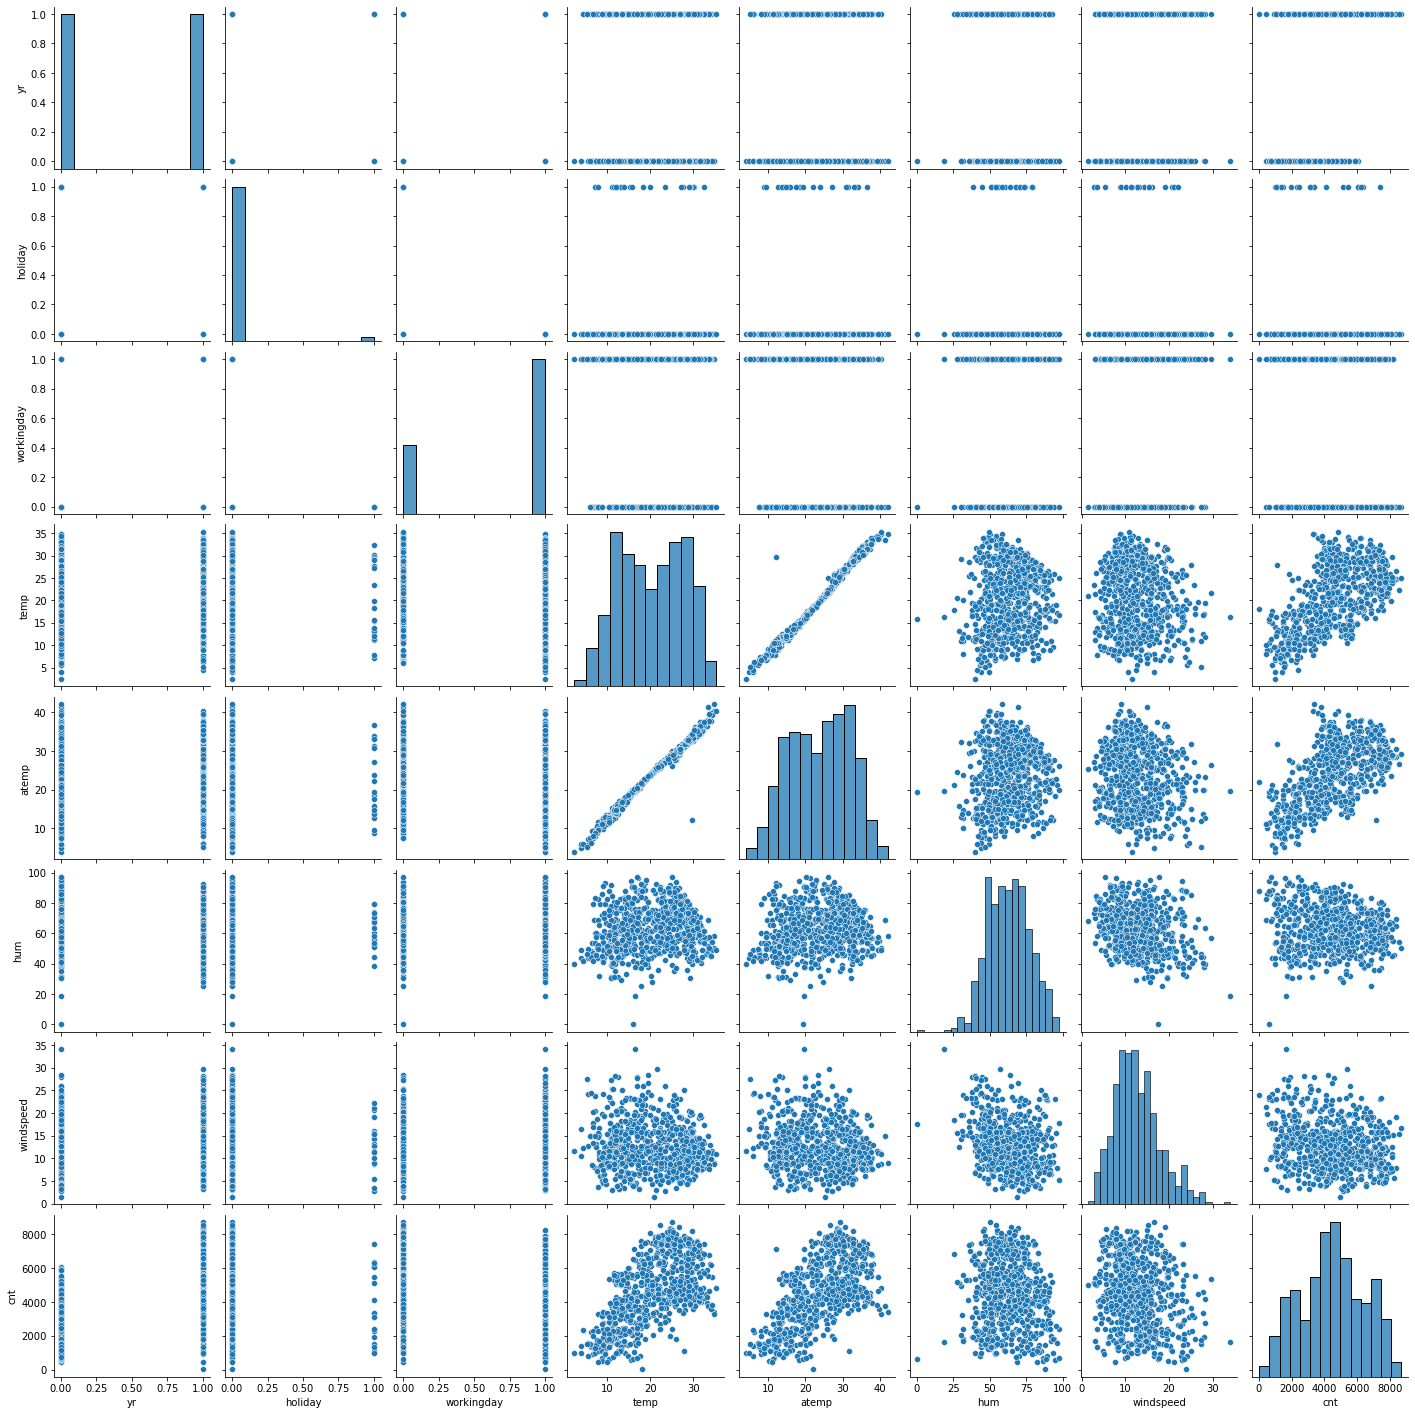

In [22]:
sns.pairplot(bike_data)
plt.show()

**Observations on Numerical variables:**
- teamp & atemp are highly correlated
- temp & cnt seems to correlated
- ateamp & cnt seems to correlated
- hum & windspeed seems to have a sort of negative correlation with cnt

### 1.b.(ii) - Categorical Variables

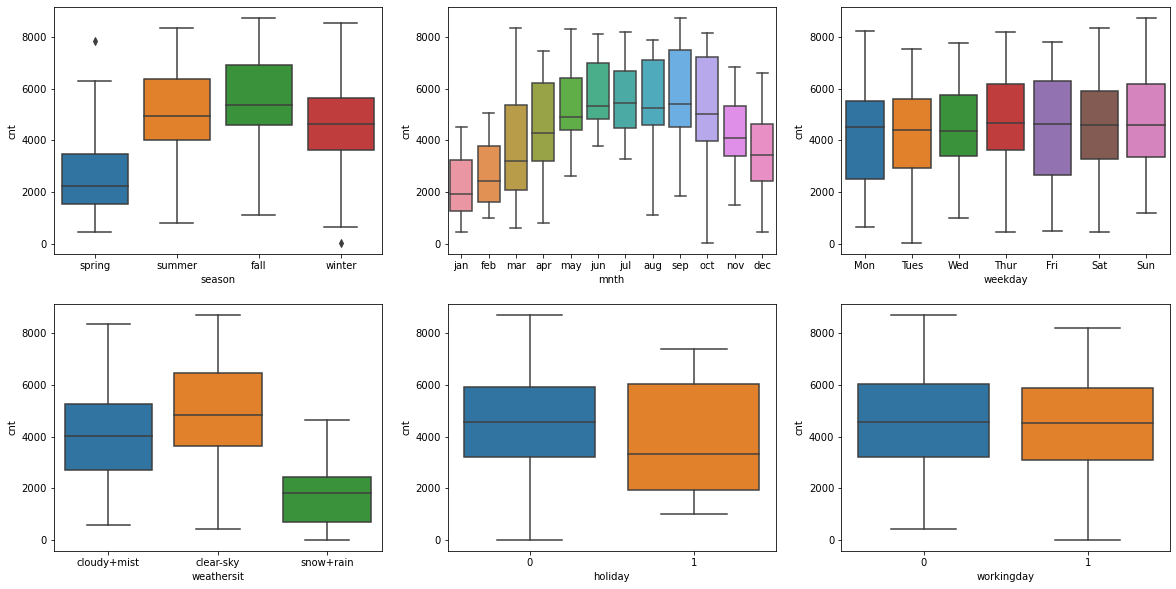

In [23]:
plt.figure(figsize=(20,10))
plt.subplot(2, 3, 1)
sns.boxplot(x="season", y="cnt", data=bike_data)

plt.subplot(2, 3, 2)
sns.boxplot(x="mnth", y="cnt", data=bike_data)

plt.subplot(2, 3, 3)
sns.boxplot(x="weekday", y="cnt", data=bike_data)

plt.subplot(2, 3, 4)
sns.boxplot(x="weathersit", y="cnt", data=bike_data)

plt.subplot(2,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_data)

plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_data)

plt.show()

**Observations on Categorical variables:**
- season seems to have no outliers, but the mean during summer & fall seasons the cnt is higher when compared during spring and winter
- during spring season, the cnt seems to be greated impacted
- during the month of jun, jul there seems to be the maximum usage 
- month of mar & oct seems to have too high and low range values
- Friday seems to be the best day which records good distribution of cnt, might be because of coming weekend
- the bike is least preferred during snow+rain weather, which seems to be expected

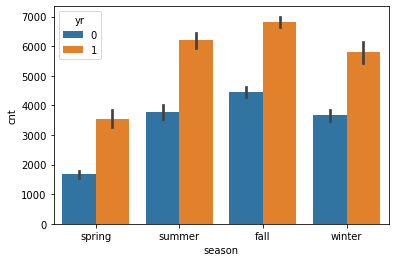

In [24]:
season_cnt = sns.barplot(data=bike_data, x="season", y="cnt", hue="yr")
plt.show()
# yr : year (0: 2018, 1:2019)

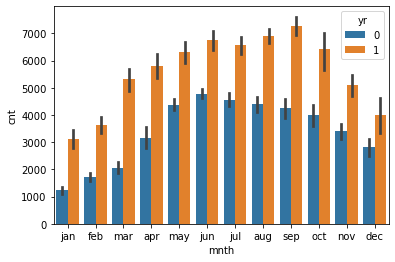

In [25]:
mnth_cnt = sns.barplot(data=bike_data, x="mnth", y="cnt", hue="yr")
# yr : year (0: 2018, 1:2019)

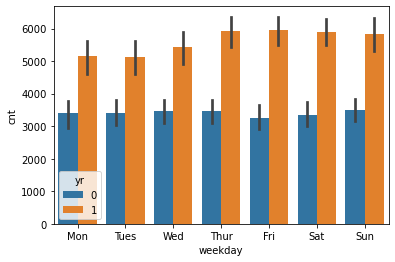

In [26]:
weekday_cnt = sns.barplot(data=bike_data, x="weekday", y="cnt", hue="yr")
# yr : year (0: 2018, 1:2019)

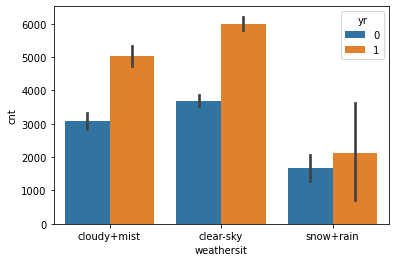

In [27]:
weathersit_cnt = sns.barplot(data=bike_data, x="weathersit", y="cnt", hue="yr")
# yr : year (0: 2018, 1:2019)

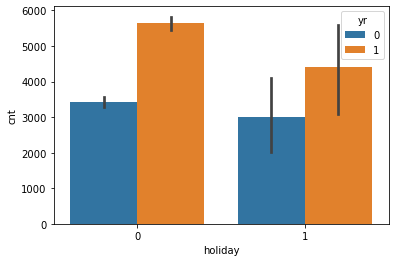

In [28]:
holiday_cnt = sns.barplot(data=bike_data, x="holiday", y="cnt", hue="yr")
# yr : year (0: 2018, 1:2019)

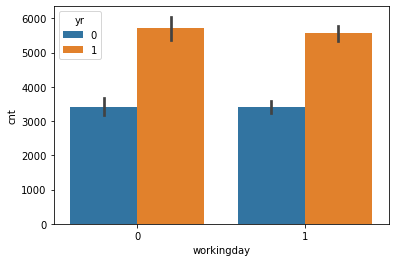

In [29]:
workingday_cnt = sns.barplot(data=bike_data, x="workingday", y="cnt", hue="yr")
# yr : year (0: 2018, 1:2019)

## 1.c. - Data Preparation

### 1.c.(i) - Setting up Dummy Variables

In [30]:
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,Mon,1,cloudy+mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,Tues,1,cloudy+mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,Wed,1,clear-sky,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,Thur,1,clear-sky,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,Fri,1,clear-sky,9.305237,11.46350,43.6957,12.522300,1600


In [31]:
# season column
season = pd.get_dummies(bike_data['season'], drop_first = True)
season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [32]:
season.value_counts()

spring  summer  winter
0       0       0         188
        1       0         184
1       0       0         180
0       0       1         178
dtype: int64

In [33]:
# mnth column
month = pd.get_dummies(bike_data['mnth'], drop_first = True)
month.head()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [34]:
# weekday column
weekday = pd.get_dummies(bike_data['weekday'], drop_first = True)
weekday.head()

,Mon,Sat,Sun,Thur,Tues,Wed
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [35]:
# weathersit column
weathersit = pd.get_dummies(bike_data['weathersit'], drop_first = True)
weathersit.head()

,cloudy+mist,snow+rain
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


### 1.c.(ii) - Merge & create new Dataframe

In [36]:
new_bike_data = pd.concat([bike_data,season,month,weekday,weathersit], axis = 1)
new_bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,oct,sep,Mon,Sat,Sun,Thur,Tues,Wed,cloudy+mist,snow+rain
0,spring,0,jan,0,Mon,1,cloudy+mist,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,1,0
1,spring,0,jan,0,Tues,1,cloudy+mist,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,1,0
2,spring,0,jan,0,Wed,1,clear-sky,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,Thur,1,clear-sky,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,jan,0,Fri,1,clear-sky,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [37]:
new_bike_data.shape

(730, 34)

In [38]:
new_bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       730 non-null    object 
 1   yr           730 non-null    int64  
 2   mnth         730 non-null    object 
 3   holiday      730 non-null    int64  
 4   weekday      730 non-null    object 
 5   workingday   730 non-null    int64  
 6   weathersit   730 non-null    object 
 7   temp         730 non-null    float64
 8   atemp        730 non-null    float64
 9   hum          730 non-null    float64
 10  windspeed    730 non-null    float64
 11  cnt          730 non-null    int64  
 12  spring       730 non-null    uint8  
 13  summer       730 non-null    uint8  
 14  winter       730 non-null    uint8  
 15  aug          730 non-null    uint8  
 16  dec          730 non-null    uint8  
 17  feb          730 non-null    uint8  
 18  jan          730 non-null    uint8  
 19  jul     

### 1.c.(iii) - Removing categorical columns from the new Dataframe

In [39]:
new_bike_data.drop(['season','mnth','weekday','weathersit'],axis=1,inplace=True)
new_bike_data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,Mon,Sat,Sun,Thur,Tues,Wed,cloudy+mist,snow+rain
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
new_bike_data.shape

(730, 30)

# 2. Model building and evaluation

## 2.a. - Splitting the Data into Training and Testing Sets

In [41]:
# We specify this so that the train and test data set always have the same rows respectively
df_train, df_test = train_test_split(new_bike_data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [42]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,Mon,Sat,Sun,Thur,Tues,Wed,cloudy+mist,snow+rain
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,0,1,0,0,0,1,0
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,0,1,0,0,0,1,0


In [43]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,Mon,Sat,Sun,Thur,Tues,Wed,cloudy+mist,snow+rain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,20.102429,23.493909,63.112926,12.831318,4486.382353,0.243137,0.245098,...,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.343137,0.029412
std,0.500429,0.157763,0.453386,7.431169,8.090038,14.156632,5.291832,1952.158739,0.429398,0.430568,...,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.475223,0.169124
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,2.834381,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.606865,16.603063,52.270825,9.041918,3120.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.209597,24.020400,63.437500,12.083182,4530.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.615847,30.177700,73.250025,15.750879,5973.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.041700,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,Mon,Sat,Sun,Thur,Tues,Wed,cloudy+mist,snow+rain
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,0,0,0,0,0,0,1,1,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,1,0,0,1,0,0,0,0,1,0
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,29.315000,32.19710,30.5000,19.583229,4968,0,1,...,0,0,0,1,0,0,0,0,0,0


In [45]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,Mon,Sat,Sun,Thur,Tues,Wed,cloudy+mist,snow+rain
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,20.815737,24.255828,61.961883,12.600130,4546.981735,0.255708,0.264840,...,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.319635,0.027397
std,0.500722,0.188034,0.481313,7.689600,8.299641,14.456669,4.984858,1898.633630,0.437258,0.442259,...,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.467403,0.163612
min,0.000000,0.000000,0.000000,3.957390,4.941955,25.416700,1.500244,441.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,14.093750,17.085500,51.166700,9.021282,3303.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,20.807500,24.873150,60.916700,12.167200,4579.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,27.401653,31.155725,72.192050,15.395629,5869.500000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,34.815847,41.318550,97.250000,27.999836,8395.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 2.b. -  Rescaling the Features 

In [46]:
# We will use MinMax scaling
scaler = MinMaxScaler()

In [47]:
# Create a list of numeric vars
num_vars = ["temp","atemp","hum","windspeed","cnt"]

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,Mon,Sat,Sun,Thur,Tues,Wed,cloudy+mist,snow+rain
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,1,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,1,0


In [48]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,Mon,Sat,Sun,Thur,Tues,Wed,cloudy+mist,snow+rain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.343137,0.029412
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 2.c. - Training the model

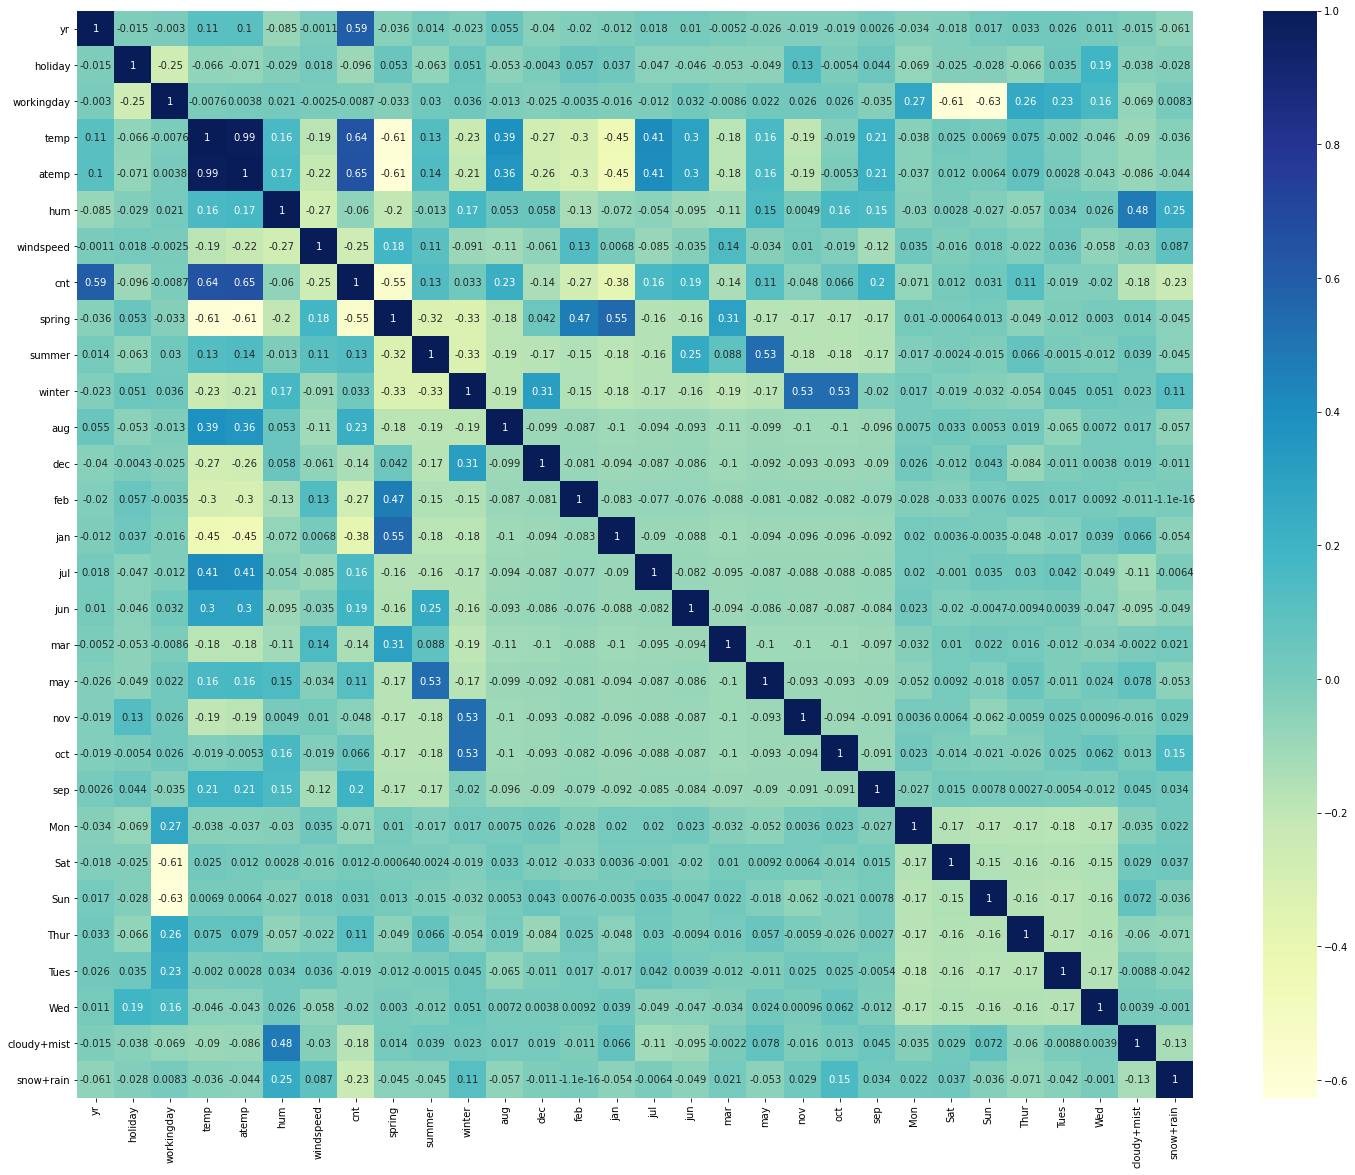

In [49]:
# heatmap
plt.figure(figsize = (25,20))
sns.heatmap(df_train.corr(), annot=True, cmap="YlGnBu")
plt.show()

**Observations:**
- There is a high correlation between temp and atemp
- The calender months and climate has got good correlation

## 2.d. - Building our Model

### 2.d.(i) - Dividing into X and Y sets for the model building

In [50]:
y_train = df_train.pop("cnt")

In [51]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [52]:
X_train = df_train
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,oct,sep,Mon,Sat,Sun,Thur,Tues,Wed,cloudy+mist,snow+rain
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,0,1,0,0,0,1,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,0,1,0,0,0,1,0


### 2.d.(ii) - Using RFE to select variables

In [53]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [54]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [55]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 10),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 14),
 ('mar', False, 15),
 ('may', False, 7),
 ('nov', True, 1),
 ('oct', False, 12),
 ('sep', True, 1),
 ('Mon', False, 9),
 ('Sat', False, 4),
 ('Sun', False, 5),
 ('Thur', False, 13),
 ('Tues', False, 8),
 ('Wed', False, 11),
 ('cloudy+mist', True, 1),
 ('snow+rain', True, 1)]

In [56]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'dec', 'jan', 'jul', 'nov', 'sep', 'cloudy+mist',
       'snow+rain'],
      dtype='object')

In [57]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'aug', 'feb', 'jun', 'mar', 'may', 'oct', 'Mon',
       'Sat', 'Sun', 'Thur', 'Tues', 'Wed'],
      dtype='object')

### 2.d.(iii) - Building Model-01 using RFE selected variables

In [58]:
#Creating a train dataset using RFE variables
X_train_rfe = X_train[col]
X_train_rfe.head()

,yr,holiday,temp,hum,windspeed,spring,summer,winter,dec,jan,jul,nov,sep,cloudy+mist,snow+rain
653,1,0,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,1,0
728,1,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,1,0


In [59]:
# Adding a constant to X_train_rfe
X_train_rfe = sm.add_constant(X_train_rfe)
X_train_rfe.head()

,const,yr,holiday,temp,hum,windspeed,spring,summer,winter,dec,jan,jul,nov,sep,cloudy+mist,snow+rain
653,1.0,1,0,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,1,0
728,1.0,1,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,1,0


In [60]:
lm1 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [61]:
#Checking the summary
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Tue, 07 Dec 2021   Prob (F-statistic):          3.34e-189
Time:                        19:37:07   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3202      0.036      8.886      0.000       0.249       0.391
yr              0.2303      0.008     28.511      0.000       0.214       0.246
holiday        -0.0912      0.026     -3.566      0.000      -0.141      -0.041
temp            0.4800      0.037     12.977      0.000       0.407       0.553
hum            -0.1602      0.038     -4.240      0.000      -0.234      -0.086
windspeed      -0.1885      0.026     -7.312      0.000      -0.239      -0.138
spring         -0.0617      0.021     -2.907      0.004      -0.103      -0.020
summer          0.0408      0.015      2.659      0.008       0.011       0.071
winter          0.1034      0.018      5.763      0.000       0.068       0.139
dec            -0.0372      0.017     -2.131      0.034      -0.071      -0.003
jan            -0.0437      0.018     -2.415      0.016      -0.079      -0.008
jul            -0.0555      0.018     -3.046      0.002      -0.091      -0.020
nov            -0.0409      0.019     -2.187      0.029      -0.078      -0.004
sep             0.0749      0.017      4.438      0.000       0.042       0.108
cloudy+mist    -0.0559      0.010     -5.338      0.000      -0.076      -0.035
snow+rain      -0.2481      0.026     -9.402      0.000      -0.300      -0.196
==============================================================================
Omnibus:                       67.327   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.896
Skew:                          -0.684   Prob(JB):                     1.56e-36
Kurtosis:                       5.427   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2.d.(iv) - Calculating VIFs for Model-01

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Dropping constant variable from the df
X_train_rfe = X_train_rfe.drop(["const"], axis=1)

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.81
13,cloudy+mist,2.32
0,yr,2.09
11,nov,1.83
9,jan,1.75


### 2.d.(v) - Building Model-02 using RFE selected variables

In [63]:
# Dropping dec variable as it has the highest p-value
X_train_rfe.drop(columns='dec', inplace=True)

# Adding a constant to X_train_rfe
X_train_rfe = sm.add_constant(X_train_rfe)

# Creating a LR object which we will use to fit the line.
lm2 = sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.4
Date:                Tue, 07 Dec 2021   Prob (F-statistic):          2.25e-189
Time:                        19:37:07   Log-Likelihood:                 512.39
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     495   BIC:                            -931.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3030      0.035      8.597      0.000       0.234       0.372
yr              0.2301      0.008     28.386      0.000       0.214       0.246
holiday        -0.0922      0.026     -3.592      0.000      -0.143      -0.042
temp            0.5052      0.035     14.369      0.000       0.436       0.574
hum            -0.1682      0.038     -4.457      0.000      -0.242      -0.094
windspeed      -0.1854      0.026     -7.179      0.000      -0.236      -0.135
spring         -0.0564      0.021     -2.664      0.008      -0.098      -0.015
summer          0.0466      0.015      3.080      0.002       0.017       0.076
winter          0.0986      0.018      5.519      0.000       0.064       0.134
jan            -0.0339      0.018     -1.929      0.054      -0.068       0.001
jul            -0.0562      0.018     -3.076      0.002      -0.092      -0.020
nov            -0.0253      0.017     -1.463      0.144      -0.059       0.009
sep             0.0798      0.017      4.755      0.000       0.047       0.113
cloudy+mist    -0.0543      0.010     -5.182      0.000      -0.075      -0.034
snow+rain      -0.2418      0.026     -9.187      0.000      -0.293      -0.190
==============================================================================
Omnibus:                       60.875   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.686
Skew:                          -0.640   Prob(JB):                     2.82e-31
Kurtosis:                       5.233   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2.d.(vi) - Calculating VIFs for Model-02

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Dropping constant variable from the df
X_train_rfe = X_train_rfe.drop(['const'], axis=1) 

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,29.12
2,temp,16.80
4,windspeed,4.71
5,spring,4.37
7,winter,3.78
6,summer,2.79
12,cloudy+mist,2.29
0,yr,2.09
8,jan,1.67
9,jul,1.59


### 2.d.(vii) - Building Model-03 using RFE selected variables

In [65]:
# Dropping nov variable
X_train_rfe.drop(columns='nov', inplace=True)

# Adding a constant to X_train_rfe
X_train_rfe = sm.add_constant(X_train_rfe)

# Creating a LR object which we will use to fit the line.
lm3 = sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.5
Date:                Tue, 07 Dec 2021   Prob (F-statistic):          4.45e-190
Time:                        19:37:07   Log-Likelihood:                 511.29
No. Observations:                 510   AIC:                            -994.6
Df Residuals:                     496   BIC:                            -935.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2957      0.035      8.466      0.000       0.227       0.364
yr              0.2301      0.008     28.348      0.000       0.214       0.246
holiday        -0.0968      0.026     -3.796      0.000      -0.147      -0.047
temp            0.5127      0.035     14.720      0.000       0.444       0.581
hum            -0.1665      0.038     -4.410      0.000      -0.241      -0.092
windspeed      -0.1871      0.026     -7.243      0.000      -0.238      -0.136
spring         -0.0518      0.021     -2.472      0.014      -0.093      -0.011
summer          0.0491      0.015      3.259      0.001       0.019       0.079
winter          0.0931      0.017      5.324      0.000       0.059       0.127
jan            -0.0331      0.018     -1.881      0.061      -0.068       0.001
jul            -0.0559      0.018     -3.056      0.002      -0.092      -0.020
sep             0.0825      0.017      4.940      0.000       0.050       0.115
cloudy+mist    -0.0541      0.010     -5.159      0.000      -0.075      -0.034
snow+rain      -0.2405      0.026     -9.135      0.000      -0.292      -0.189
==============================================================================
Omnibus:                       58.682   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.185
Skew:                          -0.624   Prob(JB):                     1.20e-29
Kurtosis:                       5.171   Cond. No.                         19.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2.d.(viii) - Calculating VIFs for Model-03

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Dropping constant variable from the df
X_train_rfe = X_train_rfe.drop(['const'], axis=1) 

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,29.05
2,temp,16.70
4,windspeed,4.66
5,spring,4.34
7,winter,3.38
6,summer,2.78
11,cloudy+mist,2.28
0,yr,2.09
8,jan,1.67
9,jul,1.59


### 2.d.(ix) - Building Model-04 using RFE selected variables

In [67]:
# Dropping hum variable as it has a high VIF value
X_train_rfe.drop(columns='hum', inplace=True)

# Adding a constant to X_train_rfe
X_train_rfe = sm.add_constant(X_train_rfe)

# Creating a LR object which we will use to fit the line.
lm4 = sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     213.1
Date:                Tue, 07 Dec 2021   Prob (F-statistic):          3.97e-187
Time:                        19:37:07   Log-Likelihood:                 501.48
No. Observations:                 510   AIC:                            -977.0
Df Residuals:                     497   BIC:                            -921.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2155      0.030      7.096      0.000       0.156       0.275
yr              0.2342      0.008     28.524      0.000       0.218       0.250
holiday        -0.0973      0.026     -3.747      0.000      -0.148      -0.046
temp            0.4728      0.034     13.803      0.000       0.405       0.540
windspeed      -0.1549      0.025     -6.140      0.000      -0.205      -0.105
spring         -0.0615      0.021     -2.898      0.004      -0.103      -0.020
summer          0.0422      0.015      2.766      0.006       0.012       0.072
winter          0.0771      0.017      4.424      0.000       0.043       0.111
jan            -0.0380      0.018     -2.125      0.034      -0.073      -0.003
jul            -0.0507      0.019     -2.728      0.007      -0.087      -0.014
sep             0.0762      0.017      4.500      0.000       0.043       0.110
cloudy+mist    -0.0807      0.009     -9.222      0.000      -0.098      -0.063
snow+rain      -0.2864      0.025    -11.623      0.000      -0.335      -0.238
==============================================================================
Omnibus:                       59.984   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.130
Skew:                          -0.637   Prob(JB):                     2.75e-30
Kurtosis:                       5.187   Cond. No.                         17.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2.d.(x) - Calculating VIFs for Model-04

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Dropping constant variable from the df
X_train_rfe = X_train_rfe.drop(['const'], axis=1) 

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.13
3,windspeed,4.61
4,spring,2.75
5,summer,2.22
0,yr,2.07
6,winter,1.79
7,jan,1.61
8,jul,1.59
10,cloudy+mist,1.56
9,sep,1.34


#### lets add jun its has 2nd highest "cnt" in year 2019 after month sep

In [69]:
X_train_rfe.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'spring', 'summer', 'winter',
       'jan', 'jul', 'sep', 'cloudy+mist', 'snow+rain'],
      dtype='object')

In [70]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'aug', 'feb', 'jun', 'mar', 'may', 'oct', 'Mon',
       'Sat', 'Sun', 'Thur', 'Tues', 'Wed'],
      dtype='object')

### 2.d.(xi) - Building Model-05 adding one variable

In [71]:
# Dropping "jan" variable
X_train_rfe.drop(columns='jan', inplace=True)

# Adding a constant to X_train_rfe
X_train_rfe = sm.add_constant(X_train_rfe)

# Creating a LR object which we will use to fit the line.
lm5 = sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Tue, 07 Dec 2021   Prob (F-statistic):          2.40e-187
Time:                        19:37:07   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1996      0.030      6.758      0.000       0.142       0.258
yr              0.2335      0.008     28.361      0.000       0.217       0.250
holiday        -0.0980      0.026     -3.761      0.000      -0.149      -0.047
temp            0.4915      0.033     14.798      0.000       0.426       0.557
windspeed      -0.1480      0.025     -5.893      0.000      -0.197      -0.099
spring         -0.0669      0.021     -3.167      0.002      -0.108      -0.025
summer          0.0453      0.015      2.971      0.003       0.015       0.075
winter          0.0831      0.017      4.818      0.000       0.049       0.117
jul            -0.0524      0.019     -2.811      0.005      -0.089      -0.016
sep             0.0767      0.017      4.511      0.000       0.043       0.110
cloudy+mist    -0.0816      0.009     -9.301      0.000      -0.099      -0.064
snow+rain      -0.2852      0.025    -11.536      0.000      -0.334      -0.237
==============================================================================
Omnibus:                       59.298   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.189
Skew:                          -0.628   Prob(JB):                     4.41e-30
Kurtosis:                       5.187   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2.d.(xii) - Calculating VIFs for Model-05

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Dropping constant variable from the df
X_train_rfe = X_train_rfe.drop(['const'], axis=1) 

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,summer,2.21
4,spring,2.08
0,yr,2.07
6,winter,1.79
7,jul,1.58
9,cloudy+mist,1.55
8,sep,1.34
10,snow+rain,1.08


### 2.d.(xiii) - Building Model-06 adding one variable

In [73]:
# Adding weekday "workingday" variable
X_train_rfe["workingday"] = X_train["workingday"]

# Adding a constant to X_train_rfe
X_train_rfe = sm.add_constant(X_train_rfe)

# Creating a LR object which we will use to fit the line.
lm6 = sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     213.7
Date:                Tue, 07 Dec 2021   Prob (F-statistic):          2.23e-187
Time:                        19:37:07   Log-Likelihood:                 502.08
No. Observations:                 510   AIC:                            -978.2
Df Residuals:                     497   BIC:                            -923.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2169      0.030      7.163      0.000       0.157       0.276
yr              0.2334      0.008     28.479      0.000       0.217       0.249
holiday        -0.1146      0.027     -4.267      0.000      -0.167      -0.062
temp            0.4905      0.033     14.836      0.000       0.426       0.555
windspeed      -0.1481      0.025     -5.928      0.000      -0.197      -0.099
spring         -0.0672      0.021     -3.193      0.001      -0.109      -0.026
summer          0.0460      0.015      3.029      0.003       0.016       0.076
winter          0.0843      0.017      4.907      0.000       0.051       0.118
jul            -0.0530      0.019     -2.855      0.004      -0.089      -0.017
sep             0.0762      0.017      4.506      0.000       0.043       0.109
cloudy+mist    -0.0834      0.009     -9.518      0.000      -0.101      -0.066
snow+rain      -0.2861      0.025    -11.626      0.000      -0.334      -0.238
workingday     -0.0222      0.009     -2.385      0.017      -0.041      -0.004
==============================================================================
Omnibus:                       64.475   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.280
Skew:                          -0.698   Prob(JB):                     5.70e-31
Kurtosis:                       5.146   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2.d.(xiv) - Calculating VIFs for Model-06

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Dropping constant variable from the df
X_train_rfe = X_train_rfe.drop(['const'], axis=1) 

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.97
3,windspeed,4.62
11,workingday,3.54
4,spring,2.32
5,summer,2.30
0,yr,2.07
6,winter,1.99
7,jul,1.58
9,cloudy+mist,1.55
8,sep,1.34


### 2.d.(xv) - Building Model-07 adding one variable

In [75]:
# Dropping "jul" variable
X_train_rfe.drop(columns='jul', inplace=True)

# Adding a constant to X_train_rfe
X_train_rfe = sm.add_constant(X_train_rfe)

# Creating a LR object which we will use to fit the line.
lm7 = sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lm7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     229.1
Date:                Tue, 07 Dec 2021   Prob (F-statistic):          8.05e-187
Time:                        19:37:08   Log-Likelihood:                 497.93
No. Observations:                 510   AIC:                            -971.9
Df Residuals:                     498   BIC:                            -921.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2079      0.030      6.854      0.000       0.148       0.267
yr              0.2339      0.008     28.357      0.000       0.218       0.250
holiday        -0.1132      0.027     -4.185      0.000      -0.166      -0.060
temp            0.4770      0.033     14.475      0.000       0.412       0.542
windspeed      -0.1483      0.025     -5.893      0.000      -0.198      -0.099
spring         -0.0552      0.021     -2.659      0.008      -0.096      -0.014
summer          0.0618      0.014      4.347      0.000       0.034       0.090
winter          0.0972      0.017      5.830      0.000       0.064       0.130
sep             0.0907      0.016      5.573      0.000       0.059       0.123
cloudy+mist    -0.0819      0.009     -9.299      0.000      -0.099      -0.065
snow+rain      -0.2869      0.025    -11.579      0.000      -0.336      -0.238
workingday     -0.0219      0.009     -2.333      0.020      -0.040      -0.003
==============================================================================
Omnibus:                       69.459   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.300
Skew:                          -0.746   Prob(JB):                     2.31e-33
Kurtosis:                       5.201   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2.d.(xvi) - Calculating VIFs for Model-07

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Dropping constant variable from the df
X_train_rfe = X_train_rfe.drop(['const'], axis=1) 

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.74
3,windspeed,4.61
10,workingday,3.54
4,spring,2.23
0,yr,2.07
5,summer,1.98
6,winter,1.83
8,cloudy+mist,1.55
7,sep,1.23
1,holiday,1.11


In [77]:
# Printing the feature variables used.
X_train_rfe.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'spring', 'summer', 'winter',
       'sep', 'cloudy+mist', 'snow+rain', 'workingday'],
      dtype='object')

In [78]:
# Adding the constant
X_train_rfe = sm.add_constant(X_train_rfe)

#Building the model
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

# Printing the summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     229.1
Date:                Tue, 07 Dec 2021   Prob (F-statistic):          8.05e-187
Time:                        19:37:08   Log-Likelihood:                 497.93
No. Observations:                 510   AIC:                            -971.9
Df Residuals:                     498   BIC:                            -921.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2079      0.030      6.854      0.000       0.148       0.267
yr              0.2339      0.008     28.357      0.000       0.218       0.250
holiday        -0.1132      0.027     -4.185      0.000      -0.166      -0.060
temp            0.4770      0.033     14.475      0.000       0.412       0.542
windspeed      -0.1483      0.025     -5.893      0.000      -0.198      -0.099
spring         -0.0552      0.021     -2.659      0.008      -0.096      -0.014
summer          0.0618      0.014      4.347      0.000       0.034       0.090
winter          0.0972      0.017      5.830      0.000       0.064       0.130
sep             0.0907      0.016      5.573      0.000       0.059       0.123
cloudy+mist    -0.0819      0.009     -9.299      0.000      -0.099      -0.065
snow+rain      -0.2869      0.025    -11.579      0.000      -0.336      -0.238
workingday     -0.0219      0.009     -2.333      0.020      -0.040      -0.003
==============================================================================
Omnibus:                       69.459   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.300
Skew:                          -0.746   Prob(JB):                     2.31e-33
Kurtosis:                       5.201   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 2.d. - Residual Analysis

In [79]:
y_train_pred = lm.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

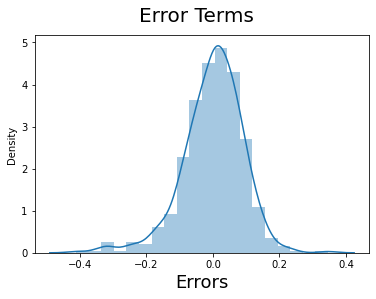

In [80]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## 2.e.- Making Predictions

In [81]:
# Applying the scaling on the test sets
num_vars = ["temp","atemp","hum","windspeed","cnt"]

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [82]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,Mon,Sat,Sun,Thur,Tues,Wed,cloudy+mist,snow+rain
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.319635,0.027397
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [83]:
y_test = df_test.pop('cnt')
X_test = df_test

In [84]:
X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'spring', 'summer',
       'winter', 'sep', 'cloudy+mist', 'snow+rain', 'workingday'],
      dtype='object')

In [85]:
#Dropping constant variable
X_train_rfe.drop(columns='const', inplace=True)

In [86]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [87]:
# Making predictions
y_pred = lm.predict(X_test_new)

## 2.f.- Model Evaluation

Text(0, 0.5, 'y_pred')

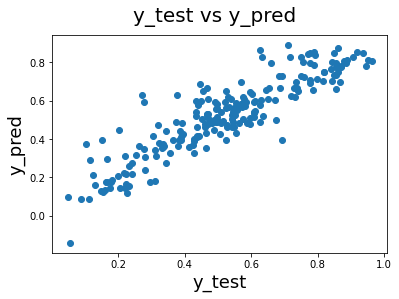

In [88]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=18)                          # Y-label

## 2.g.- Test set R-squared score

In [90]:
from sklearn.metrics import r2_score

print('Train set R-Score: ',r2_score(y_train,y_train_pred))  # R score for train data
print('Test set R-Score: ',r2_score(y_test, y_pred))

Train set R-Score:  0.8349732409548835
Test set R-Score:  0.8065130874179042


### Conclusion

From R-Sqaured and adj R-Sqaured value of both train and test dataset we could conclude that the above variables can well explain more than 80% of bike demand.